In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
data = np.genfromtxt('histograms_csv/histo_long_background.txt')

In [7]:
nbins = range(len(data))

In [8]:
short_calib = np.genfromtxt('histograms_csv/histo_time_cal.txt')
ns = np.array([2, 4, 6, 8, 10, 12, 13])

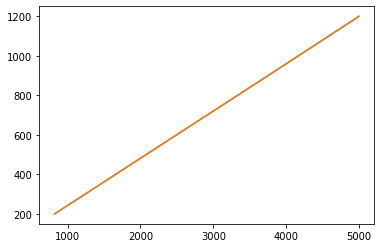

In [9]:
# Calibrate
long_calib = np.genfromtxt('histograms_csv/histo_time_calib_background_2ms.txt')
ns = np.array([200, 400, 600, 800, 1000, 1200])
nstobin = np.array([823, 1661, 2497, 3336, 4170, 4999])
plt.plot(nstobin,ns)

def linfit(x, m, b):
    return m*x + b
popt, pcov = curve_fit(linfit, nstobin, ns)
plt.plot(nstobin, linfit(nstobin, *popt))

def bintons_long(bin_):
    return 0.2393481*bin_ + 2.45985836

In [10]:
# Rebin the data
def rebin(x, y, nbins=1000):
    total_bins = len(x)
    per_bucket = int(total_bins/nbins)
    xchunks = list(zip(*[iter(x)]*per_bucket))
    ychunks = list(zip(*[iter(y)]*per_bucket))
    
    chunks = list(zip(xchunks, ychunks))
    
    x = []
    y = []
    
    for chunk in chunks:
        x.append(np.mean(chunk[0]))
        y.append(sum(chunk[1]))
    return np.array(x), np.array(y)

[-8.95631052e-06 -9.70601236e-01]
[[ 3.15517298e-14 -3.29197102e-11]
 [-3.29197102e-11  4.18624511e-08]]


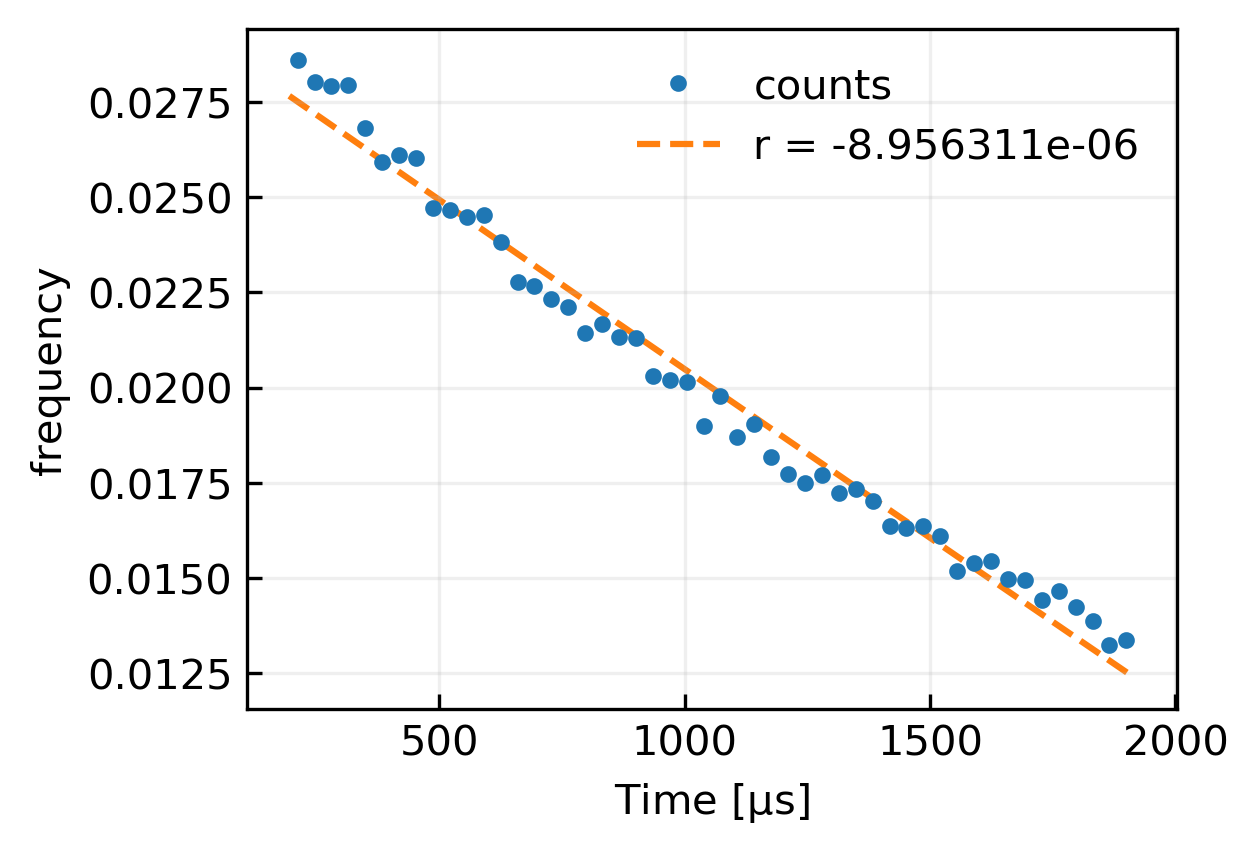

In [38]:
x = bintons_long(np.array(nbins[800:8000]))
counts = np.array(data[800:8000])
y = counts/sum(counts)
xdata, ydata = rebin(x, y, nbins = 50)

fig, ax = plt.subplots(figsize=(4,3),dpi=300)
ax.plot(xdata, ydata, label = "counts", linestyle='none', marker='.')

def func(x, b, c):
    return np.exp(b * x) + c

popt, cov = curve_fit(func, xdata, ydata, p0=(1e-10, 1))
print(popt)
print(cov)
ax.plot(x, func(x, *popt), label="r = {:e}".format(popt[0]), linestyle='--', zorder=0)

ax.set(xlabel=r"Time [$\rm \mu s$]", ylabel="frequency")
ax.tick_params(direction="in", which="both")
ax.grid(alpha=0.2)
ax.legend(frameon=False)

plt.savefig("reports/muon_bg.png", bbox_inches = 'tight')

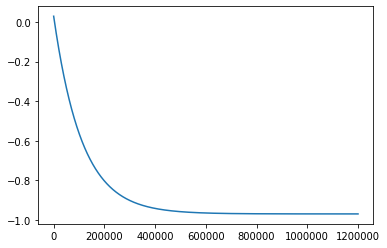

In [47]:
x = np.linspace(0,1200100,100000)
plt.plot(x, func(x, *popt))